<font size=4 >First load the required libraries.</font>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Read Data form local file path
marketing_feature_df = pd.read_csv("marketing_feature_df.csv")

In [33]:
# View database column types
marketing_feature_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

In [34]:
# Display the first five rows 
marketing_feature_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children_number,Customer_Year,Total_Mnt,Total_Purchases,Total_Campaigns
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,0,2014,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,0,2014,577,18,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,1,2014,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,2,2014,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,1,2014,91,8,2


4.Data Visualization
===

4.1 Campaign acceptance
---

<font size=4 >In this section, I will plot the overall acceptance rate of the campaign and analyze which type of activity is most easily accepted by customers.</font>

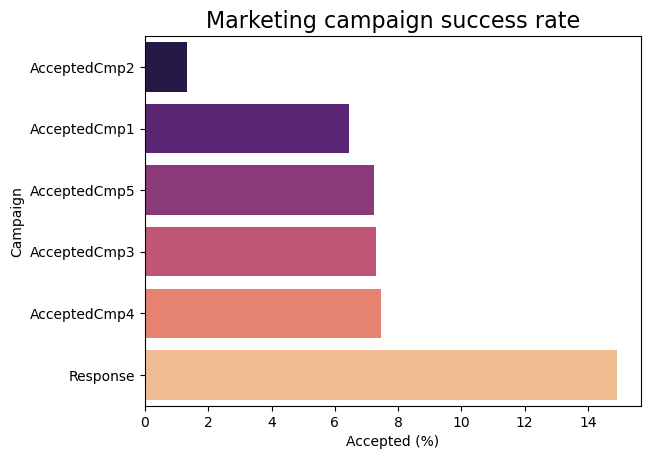

In [35]:
# calculate success rate 
cam_success = pd.DataFrame(marketing_feature_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='magma')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

<font size=4 >response has the highest customer acceptance.</font>

4.2 Average Characteristics of Customers
---

<font size=4 >Filter out unwanted columns first.</font>

In [36]:
# list of cols with binary responses
binary_cols = [col for col in marketing_feature_df.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in marketing_feature_df.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in marketing_feature_df.columns if 'Num' in col] + ['Total_Purchases', 'Total_Campaigns']

In [37]:
# average customer demographics
demographics = pd.DataFrame(round(marketing_feature_df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Customer_Year', 'Income', 'Children_number', 'Kidhome', 'Teenhome', 'Recency'])

demographics

,Average
Year_Birth,1968.9
Customer_Year,2013.0
Income,52227.4
Children_number,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


4.3 Most Popular Product
---

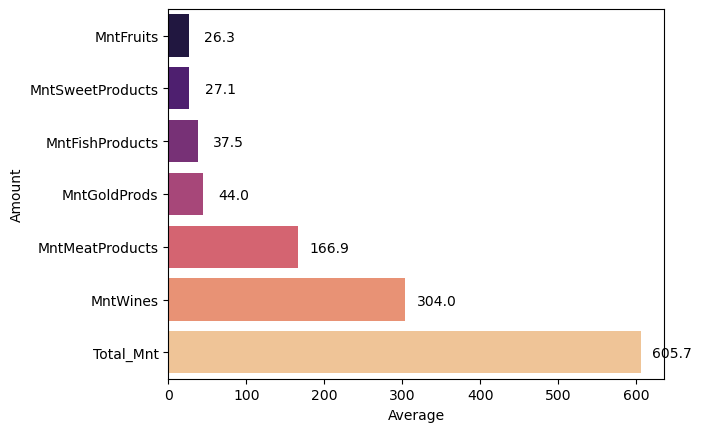

In [38]:
spending = pd.DataFrame(round(marketing_feature_df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='magma')
plt.ylabel('Amount')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

<font size=4 >It can be seen that the most popular products are wines and meat.</font>

4.4 Acceptance by different channels
---

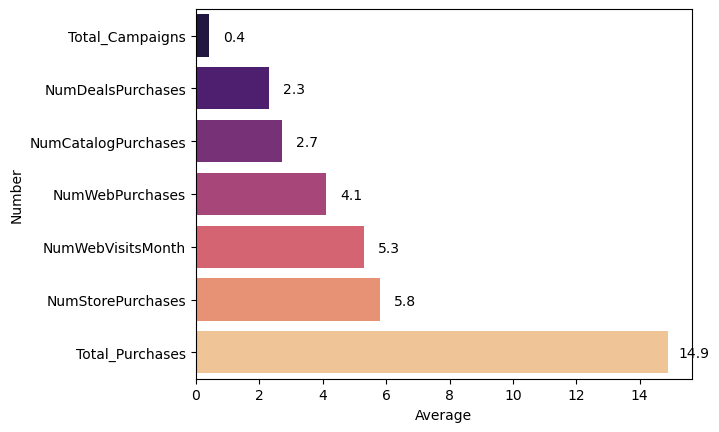

In [39]:
channels = pd.DataFrame(round(marketing_feature_df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='magma')
plt.ylabel('Number')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

<font size=4 >It can be observed that the acceptance level is higher for stores and web pages, while the worst is for advertising campaigns and DealsPurchases.</font>

<font size=4 >Marketing Recommendations:</font>

<font size=4 >1.The most successful campaign was the recent 'Response' campaign, with the highest acceptance rate in the Mexican region.</font>

<font size=4 >2.The acceptance of advertising campaigns shows a positive correlation with income and a negative correlation with the number of children.</font>

<font size=4 >3.The best-selling products are wines and meat.</font>

<font size=4 >4.WebPurchases and StorePurchases are preferable channels for purchases.</font>

<font size=4 >5.DealsPurchases and CatalogPurchases are less effective channels for purchases.</font>